# Decision tree

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
data_set=pd.read_csv("/Users/satyarth/Downloads/TCGA-PANCAN-HiSeq-801x20531/data.csv",index_col=[0])
data_set

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [4]:
data_set.isnull()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sample_1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sample_2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sample_3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sample_4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sample_797,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sample_798,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sample_799,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, sample_0 to sample_800
Columns: 20531 entries, gene_0 to gene_20530
dtypes: float64(20531)
memory usage: 125.5+ MB


In [6]:
data_set.isnull().sum()#here is no missing value

gene_0        0
gene_1        0
gene_2        0
gene_3        0
gene_4        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20531, dtype: int64

In [7]:
label_data=pd.read_csv("/Users/satyarth/Downloads/M3_Project_/labels.csv",index_col=[0])
label_data

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA
...,...
sample_796,BRCA
sample_797,LUAD
sample_798,COAD
sample_799,PRAD


In [8]:
frames = [label_data, data_set]
df = pd.concat(frames, axis=1)
df.reset_index(drop=True, inplace=True)

# checking the shape of the combined dataframe
df.shape

(801, 20532)

In [9]:
df

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,BRCA,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,LUAD,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,COAD,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,PRAD,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [10]:
X = df.iloc[:, 1:81]
X

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_70,gene_71,gene_72,gene_73,gene_74,gene_75,gene_76,gene_77,gene_78,gene_79
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.234750,7.377931,4.511449,8.727812,0.000000,7.377931,5.574656,3.188164,10.685783,8.434069
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,9.107447,4.312113,4.516185,8.759459,0.587845,6.361812,1.813607,0.323658,9.698158,9.144467
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,4.947105,1.683023,1.306846,10.006130,0.452595,2.533663,3.403377,0.000000,10.924182,7.860553
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.769891,4.949633,2.058697,9.297597,3.184471,6.892998,4.847566,0.000000,10.265416,8.721417
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,7.694170,5.133921,4.056150,9.438910,1.831269,4.304657,4.104630,2.396187,8.063196,8.039462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,7.293324,6.448896,4.345403,8.758923,1.403213,5.745192,4.974139,0.865919,8.877131,8.938941
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,10.469754,4.301339,3.480317,9.302596,0.618051,3.948461,8.130025,2.245891,10.202993,7.783005
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,9.257897,7.185113,3.812221,8.907603,2.003926,8.495072,6.719430,2.003926,9.272124,8.786587
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,8.045973,8.545266,5.365920,8.663103,0.995304,7.666657,2.692539,1.316320,9.816004,8.480528


In [11]:
Y=label_data.values
Y

array([['PRAD'],
       ['LUAD'],
       ['PRAD'],
       ['PRAD'],
       ['BRCA'],
       ['PRAD'],
       ['KIRC'],
       ['PRAD'],
       ['BRCA'],
       ['PRAD'],
       ['BRCA'],
       ['KIRC'],
       ['PRAD'],
       ['BRCA'],
       ['BRCA'],
       ['BRCA'],
       ['LUAD'],
       ['KIRC'],
       ['KIRC'],
       ['PRAD'],
       ['BRCA'],
       ['KIRC'],
       ['LUAD'],
       ['BRCA'],
       ['KIRC'],
       ['LUAD'],
       ['COAD'],
       ['BRCA'],
       ['BRCA'],
       ['BRCA'],
       ['BRCA'],
       ['BRCA'],
       ['KIRC'],
       ['BRCA'],
       ['PRAD'],
       ['BRCA'],
       ['KIRC'],
       ['LUAD'],
       ['BRCA'],
       ['BRCA'],
       ['KIRC'],
       ['PRAD'],
       ['PRAD'],
       ['KIRC'],
       ['KIRC'],
       ['BRCA'],
       ['PRAD'],
       ['COAD'],
       ['BRCA'],
       ['LUAD'],
       ['BRCA'],
       ['LUAD'],
       ['BRCA'],
       ['PRAD'],
       ['COAD'],
       ['BRCA'],
       ['BRCA'],
       ['COAD'],
       ['KIRC'

In [12]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y)

#view transformed values
print(y_transformed)



[4 3 4 4 0 4 2 4 0 4 0 2 4 0 0 0 3 2 2 4 0 2 3 0 2 3 1 0 0 0 0 0 2 0 4 0 2
 3 0 0 2 4 4 2 2 0 4 1 0 3 0 3 0 4 1 0 0 1 2 0 3 2 0 3 4 1 0 4 2 0 2 0 0 3
 0 3 0 2 4 1 0 4 0 0 4 4 0 0 2 0 4 4 0 0 0 4 1 0 4 0 0 2 0 2 3 2 3 1 3 3 4
 0 3 4 0 2 2 2 0 0 3 2 3 0 4 4 4 0 2 3 1 0 1 0 0 2 3 0 2 1 0 4 0 2 3 1 4 0
 3 3 3 3 0 0 3 0 0 4 4 3 4 3 2 0 4 3 1 2 3 0 2 3 0 3 0 0 0 4 0 2 1 2 0 4 4
 4 3 3 0 3 3 2 3 4 3 0 0 0 3 3 0 2 2 2 2 4 0 4 0 3 3 0 4 0 4 0 0 0 3 0 2 3
 2 2 3 0 2 4 0 3 3 4 1 0 2 4 2 1 0 2 2 3 4 4 3 3 2 0 0 1 0 4 1 0 4 2 4 4 4
 0 1 1 3 1 1 4 3 0 0 2 2 0 1 4 2 4 0 0 2 0 0 0 0 3 3 0 0 0 2 2 2 2 0 0 0 2
 0 0 3 4 0 0 1 3 4 0 0 0 1 0 4 0 1 3 3 4 2 0 2 2 3 1 2 0 0 0 0 2 0 0 4 0 2
 0 3 4 2 0 4 1 0 0 0 3 3 3 0 0 4 3 0 2 0 1 1 3 0 2 0 0 0 1 3 1 2 4 2 0 0 2
 0 1 4 3 4 0 2 4 0 1 2 2 1 1 4 0 0 1 2 0 4 0 0 0 3 3 2 3 0 2 1 4 0 3 4 0 0
 0 3 0 0 4 0 4 1 0 3 0 0 3 0 0 0 2 3 4 0 4 2 0 2 1 0 4 3 2 0 0 2 0 3 0 0 4
 1 0 2 3 4 0 4 0 0 0 0 2 3 0 2 0 0 3 3 2 1 4 1 0 2 2 0 4 2 1 3 3 0 4 4 0 4
 3 2 4 0 3 4 3 0 0 1 3 2 

/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(X,y_transformed,test_size=.2,random_state=42)

In [14]:
X_train

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_70,gene_71,gene_72,gene_73,gene_74,gene_75,gene_76,gene_77,gene_78,gene_79
616,0.0,5.257467,3.658154,7.475920,10.532229,0.0,6.581443,0.000000,0.0,0.0,...,8.224711,2.744656,2.801945,9.292071,0.000000,5.181886,2.744656,0.000000,8.066945,9.804702
329,0.0,3.972858,3.368908,6.644179,9.361722,0.0,8.306344,0.431142,0.0,0.0,...,9.090239,8.038497,7.242860,9.221457,0.762646,6.543808,3.831421,1.627513,7.813941,8.976137
342,0.0,3.571592,3.900113,6.351773,9.740098,0.0,8.413133,0.427284,0.0,0.0,...,8.624456,2.542481,4.590692,9.168995,0.756511,4.293834,4.801536,1.617440,10.245897,8.550781
394,0.0,3.835964,4.914249,6.419020,9.200234,0.0,7.591784,0.629939,0.0,0.0,...,9.637648,10.289834,8.144551,9.039901,1.067019,6.770010,3.903241,0.349139,8.658436,8.861192
79,0.0,3.219029,2.284781,8.124178,10.386132,0.0,5.780310,0.521252,0.0,0.0,...,8.261709,2.297602,2.532766,9.313643,0.521252,11.359069,6.563152,0.521252,7.840973,9.550577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,1.017138,2.526920,5.831520,9.959973,0.0,7.841583,0.000000,0.0,0.0,...,9.349392,8.729169,6.867242,8.842636,0.000000,6.200938,5.718115,2.446733,8.975281,8.679906
106,0.0,1.228542,1.880881,5.706903,10.026648,0.0,7.178426,0.449957,0.0,0.0,...,8.638476,6.031697,6.102574,9.306376,1.301061,6.418753,1.069083,0.000000,7.800984,8.045361
270,0.0,2.528396,2.620305,6.350181,9.007260,0.0,9.862189,1.446203,0.0,0.0,...,7.642362,6.304710,5.149650,8.318502,0.000000,9.217284,8.678766,5.887883,10.514684,8.655813
435,0.0,4.134196,3.722608,6.139899,9.642600,0.0,7.988401,1.683652,0.0,0.0,...,7.897622,7.102564,6.964560,9.236347,0.000000,6.821379,7.689180,2.110564,9.238522,9.006393


In [15]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()# here we have made decision tree model
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [16]:
Y_pred= clf.predict(X_test)
Y_pred

array([3, 0, 3, 2, 3, 0, 0, 3, 4, 3, 1, 0, 3, 4, 2, 3, 3, 4, 0, 3, 3, 1,
       2, 0, 0, 0, 1, 0, 4, 1, 0, 4, 4, 1, 0, 3, 3, 0, 3, 3, 1, 0, 0, 0,
       2, 3, 2, 1, 0, 0, 4, 3, 2, 4, 2, 0, 2, 0, 3, 0, 0, 2, 4, 0, 4, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 4, 4, 2, 0, 2, 3, 0, 2, 3, 0, 0, 4,
       1, 1, 1, 2, 3, 0, 0, 4, 3, 1, 1, 3, 0, 0, 0, 3, 3, 2, 0, 2, 0, 0,
       4, 2, 4, 0, 3, 4, 0, 3, 3, 4, 2, 2, 0, 3, 3, 4, 0, 0, 1, 0, 3, 0,
       4, 2, 1, 0, 4, 0, 4, 0, 0, 2, 4, 3, 0, 1, 2, 0, 0, 2, 3, 0, 0, 2,
       2, 1, 3, 1, 3, 0, 1])

In [17]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.84472049689441

# Random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(n_estimators = 100, random_state=50)# here we have made random forest model

# Train the model
my_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=50)

In [19]:
y_predict_r=my_model.predict(X_test)
y_predict_r

array([3, 0, 3, 2, 0, 0, 0, 1, 4, 3, 1, 0, 3, 4, 2, 3, 3, 4, 0, 3, 3, 1,
       2, 0, 0, 0, 1, 0, 4, 4, 0, 4, 4, 1, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0,
       2, 4, 2, 1, 0, 0, 4, 3, 2, 0, 2, 0, 2, 0, 3, 0, 3, 2, 4, 0, 4, 0,
       0, 4, 2, 0, 0, 3, 0, 0, 0, 3, 4, 4, 2, 0, 2, 0, 0, 2, 3, 0, 0, 4,
       1, 1, 1, 2, 0, 0, 0, 4, 3, 1, 1, 3, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0,
       4, 2, 4, 0, 3, 4, 0, 3, 3, 4, 2, 2, 0, 3, 3, 4, 0, 0, 1, 0, 0, 0,
       4, 2, 1, 0, 4, 0, 4, 0, 0, 2, 4, 3, 4, 1, 2, 0, 0, 2, 0, 4, 0, 2,
       2, 1, 4, 1, 3, 0, 1])

In [20]:
accuracy=accuracy_score(Y_test,y_predict_r)
accuracy

0.9627329192546584

In [21]:
x_norm_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
x_norm_train# here we have normalized values of X

/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_70,gene_71,gene_72,gene_73,gene_74,gene_75,gene_76,gene_77,gene_78,gene_79
616,0.0,0.842943,0.603309,0.592357,0.717980,NaN,0.391796,0.000000,0.0,0.0,...,0.587305,0.252613,0.285682,0.603077,0.000000,0.326303,0.242420,0.000000,0.387260,0.687477
329,0.0,0.636979,0.555606,0.392616,0.317069,NaN,0.646751,0.155142,0.0,0.0,...,0.703002,0.739849,0.738471,0.585409,0.077028,0.432017,0.338408,0.133061,0.352296,0.479628
342,0.0,0.572643,0.643213,0.322396,0.446667,NaN,0.662535,0.153754,0.0,0.0,...,0.640739,0.234006,0.468060,0.572283,0.076408,0.257371,0.424093,0.132238,0.688375,0.372927
394,0.0,0.615030,0.810466,0.338545,0.261758,NaN,0.541133,0.226678,0.0,0.0,...,0.776175,0.947059,0.830406,0.539983,0.107770,0.449575,0.344752,0.028545,0.468999,0.450794
79,0.0,0.516115,0.376810,0.748035,0.667940,NaN,0.273381,0.187568,0.0,0.0,...,0.592250,0.211467,0.258237,0.608474,0.052647,0.805785,0.579687,0.042616,0.356032,0.623729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,0.163080,0.416744,0.197458,0.521976,NaN,0.578055,0.000000,0.0,0.0,...,0.737643,0.803418,0.700174,0.490627,0.000000,0.405403,0.505050,0.200038,0.512785,0.405318
106,0.0,0.196975,0.310198,0.167532,0.544813,NaN,0.480035,0.161913,0.0,0.0,...,0.642613,0.555147,0.622209,0.606656,0.131409,0.422310,0.094426,0.000000,0.350506,0.246140
270,0.0,0.405384,0.432145,0.322013,0.195663,NaN,0.876718,0.520403,0.0,0.0,...,0.509461,0.580275,0.525051,0.359486,0.000000,0.639536,0.766548,0.481378,0.725519,0.399274
435,0.0,0.662847,0.613939,0.271515,0.413273,NaN,0.599756,0.605846,0.0,0.0,...,0.543582,0.653708,0.710096,0.589134,0.000000,0.453563,0.679143,0.172554,0.549163,0.487218


In [22]:
x_test_norm=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test))
x_test_norm

/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_70,gene_71,gene_72,gene_73,gene_74,gene_75,gene_76,gene_77,gene_78,gene_79
697,0.000000,0.540836,0.774487,0.379505,0.370466,NaN,0.183454,0.000000,0.0,0.0,...,0.517587,0.642292,0.563942,0.857887,0.000000,0.333393,0.529690,0.127017,0.329867,0.898581
668,0.000000,0.631911,0.564332,0.274985,0.510192,NaN,0.555450,0.178712,0.0,0.0,...,0.630782,0.816935,0.743955,0.537589,0.155777,0.449045,0.431216,0.088025,0.316696,0.846831
63,0.000000,0.730197,0.607960,0.241491,0.485313,NaN,0.295392,0.000000,0.0,0.0,...,0.495966,0.647634,0.587562,0.522708,0.000000,0.496567,0.368078,0.096992,0.848108,0.561711
534,0.373171,0.616933,0.590022,0.157649,0.305484,NaN,0.455076,0.238413,0.0,0.0,...,0.608590,0.674368,0.439053,0.672243,0.000000,0.905798,0.688713,0.000000,0.559781,0.711084
66,0.000000,0.755205,0.841006,0.304334,0.321640,NaN,0.681294,0.328792,0.0,0.0,...,0.631808,0.584112,0.504750,0.284402,0.000000,0.353023,0.147490,0.320168,0.461147,0.754113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.000000,0.428046,0.476736,0.417571,0.573606,NaN,0.756663,0.000000,0.0,0.0,...,0.470492,0.841298,0.602052,0.370906,0.158359,0.608944,0.096576,0.118345,0.603762,0.576293
745,0.000000,0.576331,0.696155,0.702955,0.745743,NaN,0.680928,0.000000,0.0,0.0,...,0.473176,0.121128,0.000000,0.692898,0.000000,0.698838,0.293757,0.000000,0.367967,0.709917
513,0.000000,0.578796,0.709986,0.187115,0.217696,NaN,0.764236,0.311556,0.0,0.0,...,1.000000,0.563125,0.751431,0.327867,0.326806,0.405669,0.549725,0.184668,0.513062,0.518898
671,0.000000,0.417566,0.454918,0.282667,0.430684,NaN,0.497331,0.000000,0.0,0.0,...,0.632358,0.910852,0.954944,0.515015,0.275953,0.622487,0.461664,0.465878,0.440681,0.729381


In [23]:
x_norm_train_new=x_norm_train.replace(np. nan,0) 

In [24]:
x_test_norm_new=x_test_norm.replace(np. nan,0) 

In [25]:
from sklearn.tree import DecisionTreeClassifier# after normalizing values
clf_new=DecisionTreeClassifier()
clf_new.fit(x_norm_train_new,Y_train)

DecisionTreeClassifier()

In [26]:
Y_pred_new= clf.predict(x_test_norm_new)
Y_pred_new

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3])

In [27]:
accuracy=accuracy_score(Y_test,Y_pred_new)
accuracy

0.18012422360248448

In [28]:
from sklearn.ensemble import RandomForestClassifier# after normalizing values
my_model_random_scale = RandomForestClassifier(n_estimators = 100, random_state=50)

# Train the model
my_model_random_scale.fit(x_norm_train_new,Y_train)

RandomForestClassifier(random_state=50)

In [29]:
y_predict_r_scale=my_model.predict(X_test)
y_predict_r_scale

array([3, 0, 3, 2, 0, 0, 0, 1, 4, 3, 1, 0, 3, 4, 2, 3, 3, 4, 0, 3, 3, 1,
       2, 0, 0, 0, 1, 0, 4, 4, 0, 4, 4, 1, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0,
       2, 4, 2, 1, 0, 0, 4, 3, 2, 0, 2, 0, 2, 0, 3, 0, 3, 2, 4, 0, 4, 0,
       0, 4, 2, 0, 0, 3, 0, 0, 0, 3, 4, 4, 2, 0, 2, 0, 0, 2, 3, 0, 0, 4,
       1, 1, 1, 2, 0, 0, 0, 4, 3, 1, 1, 3, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0,
       4, 2, 4, 0, 3, 4, 0, 3, 3, 4, 2, 2, 0, 3, 3, 4, 0, 0, 1, 0, 0, 0,
       4, 2, 1, 0, 4, 0, 4, 0, 0, 2, 4, 3, 4, 1, 2, 0, 0, 2, 0, 4, 0, 2,
       2, 1, 4, 1, 3, 0, 1])

In [30]:
accuracy_scale=accuracy_score(Y_test,y_predict_r_scale)
accuracy_scale

0.9627329192546584

In [44]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
n_feat=X_train.shape[1]

In [47]:
max_depth=2
n_trees=1

In [50]:
for i in range(10):# here we are calculating accuracy of decision tree , bagging meth
    seed= np.random.randint(low=0,high=100)# we want result reproducible
    df=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=max_depth,random_state=seed)
    df.fit(X_train, Y_train)
    y_dt_pred=df.predict(X_test)
    accuracy_dt=accuracy_score(Y_test,y_dt_pred)
    print("accuracy of decision tree:",accuracy_dt)
    
    bagging=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=max_depth,random_state=seed),
    n_estimators=n_trees,max_features=int(n_feat),bootstrap=True,bootstrap_features=False,oob_score=True,random_state=seed)
    bagging.fit(X_train,Y_train)
    Y_pred_bag=bagging.predict(X_test)
    accuracy_bagging=accuracy_score(Y_test,Y_pred_bag)  
    print("accuracy of bagging:",accuracy_bagging)
    
    random_forest=RandomForestClassifier(n_estimators=n_trees,criterion='gini',max_depth=max_depth,max_features=int(n_feat**0.5),oob_score=True,random_state=seed)
    random_forest.fit(X_train,Y_train)
    Y_pred_random=random_forest.predict(X_test)
    accuracy_random=accuracy_score(Y_test,Y_pred_random)  
    print("accuracy of bagging:",accuracy_random)

accuracy of decision tree: 0.6335403726708074
accuracy of bagging: 0.6583850931677019
accuracy of bagging: 0.5652173913043478
accuracy of decision tree: 0.6335403726708074
accuracy of bagging: 0.639751552795031
accuracy of bagging: 0.5962732919254659
accuracy of decision tree: 0.6335403726708074
accuracy of bagging: 0.6521739130434783
accuracy of bagging: 0.6211180124223602
accuracy of decision tree: 0.6335403726708074
accuracy of bagging: 0.6273291925465838
accuracy of bagging: 0.6024844720496895
accuracy of decision tree: 0.6335403726708074
accuracy of bagging: 0.6086956521739131
accuracy of bagging: 0.5590062111801242
accuracy of decision tree: 0.6335403726708074
accuracy of bagging: 0.6273291925465838
accuracy of bagging: 0.5590062111801242
accuracy of decision tree: 0.6335403726708074
accuracy of bagging: 0.6521739130434783
accuracy of bagging: 0.6211180124223602
accuracy of decision tree: 0.6335403726708074
accuracy of bagging: 0.6335403726708074
accuracy of bagging: 0.5776397515

/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/satyarth/opt/anaconda3/lib/python3.9/site-packages/sklearn/e

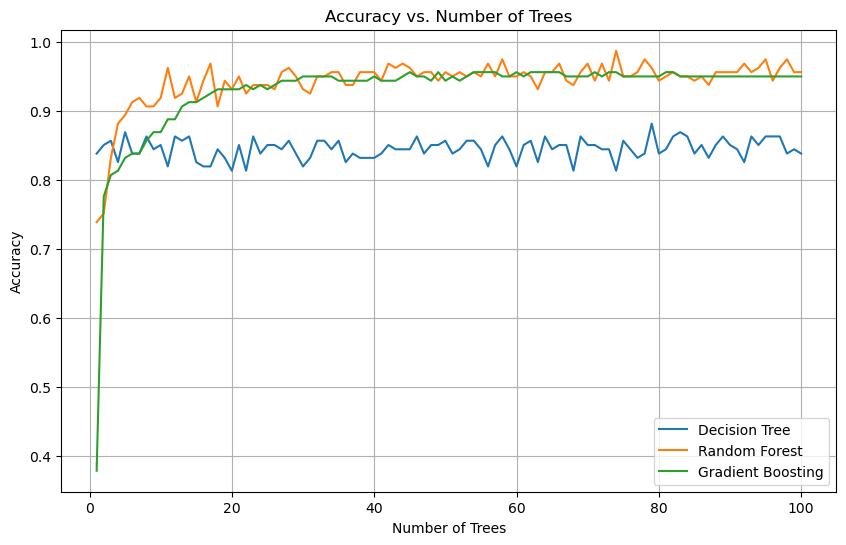

In [53]:
 import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Initialize lists to store accuracy values
acc_decision_tree = []
acc_random_forest = []
acc_boosting = []

# Vary the number of trees
num_trees_range = range(1, 101)

# Loop over different numbers of trees
for num_trees in num_trees_range:
    # Decision Tree
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, Y_train)
    dt_pred = dt_model.predict(X_test)
    acc_decision_tree.append(accuracy_score(Y_test, dt_pred))
    
    # Random Forest
    rf_model = RandomForestClassifier(n_estimators=num_trees)
    rf_model.fit(X_train, Y_train)
    rf_pred = rf_model.predict(X_test)
    acc_random_forest.append(accuracy_score(Y_test, rf_pred))
    
    # Gradient Boosting
    gb_model = GradientBoostingClassifier(n_estimators=num_trees)
    gb_model.fit(X_train, Y_train)
    gb_pred = gb_model.predict(X_test)
    acc_boosting.append(accuracy_score(Y_test, gb_pred))

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, acc_decision_tree, label='Decision Tree')
plt.plot(num_trees_range, acc_random_forest, label='Random Forest')
plt.plot(num_trees_range, acc_boosting, label='Gradient Boosting')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees')
plt.legend()
plt.grid(True)
plt.show()


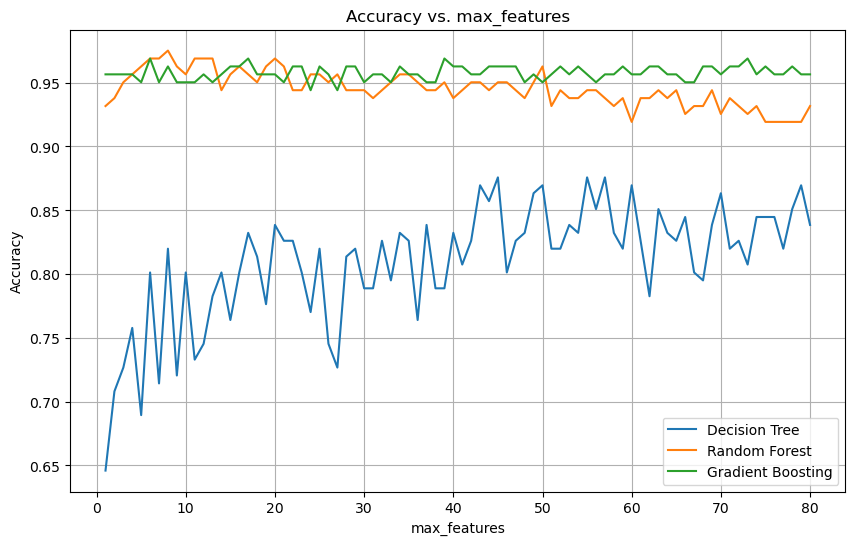

In [54]:



# Initialize lists to store accuracy values
acc_decision_tree = []
acc_random_forest = []
acc_boosting = []

# Vary the max_features parameter
max_features_range = range(1, X.shape[1] + 1)

# Loop over different max_features values
for max_features in max_features_range:
    # Decision Tree
    dt_model = DecisionTreeClassifier(max_features=max_features)
    dt_model.fit(X_train, Y_train)
    dt_pred = dt_model.predict(X_test)
    acc_decision_tree.append(accuracy_score(Y_test, dt_pred))
    
    # Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features)
    rf_model.fit(X_train, Y_train)
    rf_pred = rf_model.predict(X_test)
    acc_random_forest.append(accuracy_score(Y_test, rf_pred))
    
    # Gradient Boosting
    gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, subsample=0.8)
    gb_model.fit(X_train, Y_train)
    gb_pred = gb_model.predict(X_test)
    acc_boosting.append(accuracy_score(Y_test, gb_pred))

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(max_features_range, acc_decision_tree, label='Decision Tree')
plt.plot(max_features_range, acc_random_forest, label='Random Forest')
plt.plot(max_features_range, acc_boosting, label='Gradient Boosting')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_features')
plt.legend()
plt.grid(True)
plt.show()


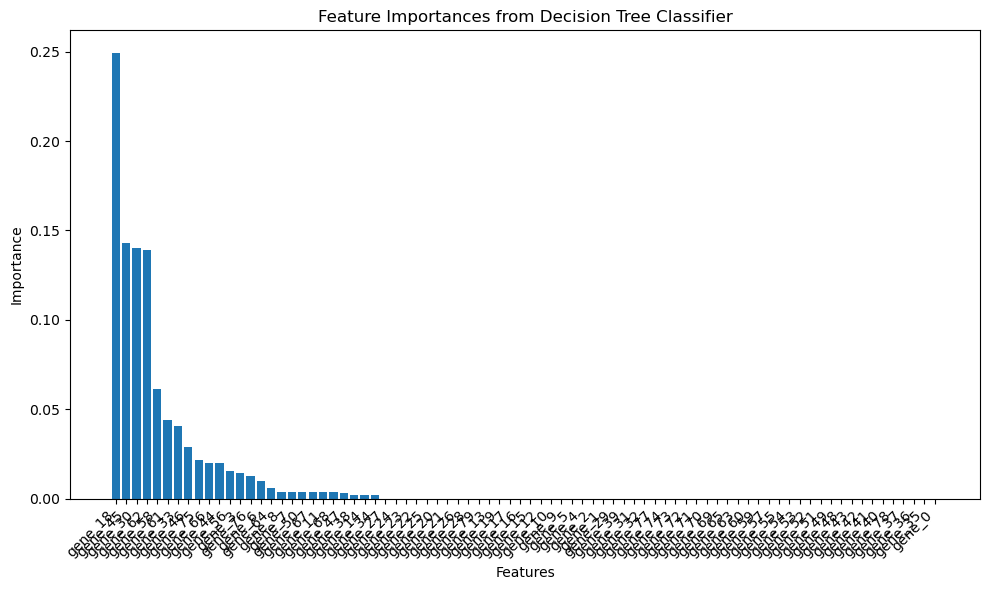

In [58]:

# Train a Decision Tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

# Get feature importances
feature_importances = dt_model.feature_importances_

# Sort features in decreasing order of importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
#sorted_features = data_set.feature_names[sorted_indices]
sorted_features = X.columns[sorted_indices]
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), sorted_importances)
plt.xticks(range(X.shape[1]), sorted_features, rotation=45, ha="right")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Decision Tree Classifier')
plt.tight_layout()
plt.show()
